# Session 1: Intro to AI on ThetaGPU (9/20/22) Homework

accuracy:  0.19


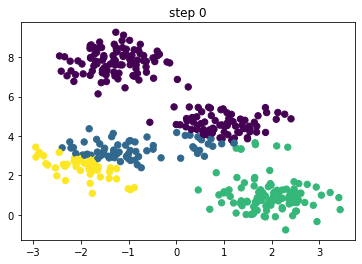

accuracy:  0.0875


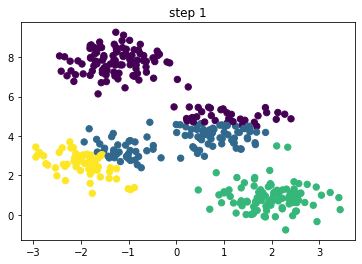

accuracy:  0.0025


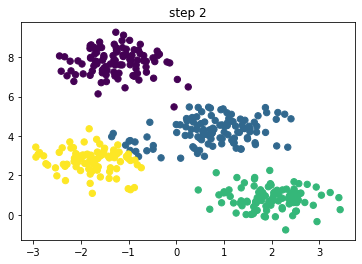

accuracy:  0.0


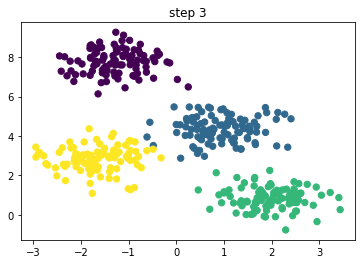

accuracy:  0.0


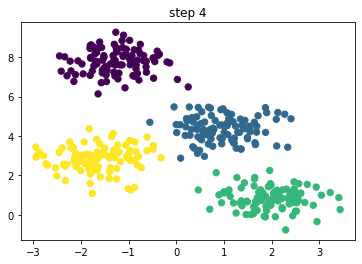

centroids unchanged as of step 5


In [16]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display as ipydis
npoints = 400
N = 4
x, cluster_labels, cluster_centers = make_blobs(n_samples=npoints, centers=N,
                       cluster_std=0.60, random_state=0,
                       return_centers=True)

def initialize_centroids(x,N):
   x_indices = np.random.choice(np.arange(0,x.shape[0]),N)
   centroids = x[x_indices]
   return centroids

def get_new_centroids(x, labels, N):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([x[labels==k].mean(axis=0) for k in range(N)])

# distance is sqrt( (x - x')**2 + (y - y')**2 )
def assign_labels(x,c):
   # centroids are shape [N,2]
   # x are shape [npoints,2]
   # add middle index to centroids to properly broadcast in math operations
   c = c[:,np.newaxis,:] # [N,1,2]
   
   # calculate (x - x')**2 and (y - y')**2
   # x is shape [npoints,2], c is [N,1,2] results in an array of shape: [N,npoints,2]
   dist2 = (x - c)**2
   
   # calculate (x - x')**2 + (y - y')**2
   dist2 = dist2.sum(axis=2) # [N,npoints]
   
   # out of the N distances, return the index (0-(N-1)) of the one that is the minimum.
   label = np.argmin(dist2,axis=0) # [npoints]

   return label

delta = 0.01
last_centroids = initialize_centroids(x,N)
last_labels = assign_labels(x,last_centroids)
step = 0
plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % -1)
plt.show()
time.sleep(1)
ipydis.clear_output(wait=True)

for i in range(0, 30):

    centroids = get_new_centroids(x,last_labels,N)
    labels = assign_labels(x,centroids)

    # test if centroids have stopped moving
    if np.all((last_centroids - centroids) <= delta):
        print('centroids unchanged as of step %d' % step)
        # done
        break
    else:
        last_labels = labels
        last_centroids = centroids

    # we can use the "truth" labels, cluster_labels to see how well we are doing
    # accuracy: # of points correctly labeled / total number of points
    accuracy = np.sum((cluster_labels == labels).astype(int)) / cluster_labels.shape[0]
    print('accuracy: ',accuracy)
    plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
    plt.title('step %d' % step)
    plt.show()
    
    step += 1
